## **1. Setup**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## **2. Load Data**

In [19]:
train_df1 = pd.read_csv("train_df.csv")
val_df1 = pd.read_csv("val_df.csv")
test_df1 = pd.read_csv("test_df.csv")

In [20]:
display(train_df1)

,x_rms,x_var,x_pvt,x_cf,x_kurt,x_clf,x_if,x_sf,x_li,x_pp,x_ent,x_sk,x_hm5,x_hm6,x_hm7,x_hm8,x_hm9,target
0,0.216361,0.045199,1.483154,6.854986,9.121544,12.503216,9.913112,1.420975,417.996216,2.438354,-12046.002532,-0.838466,-29.909991,211.118170,-1069.927809,6957.954841,-41398.701009,1
1,0.204181,0.041627,2.590942,12.689456,27.624492,26.827844,20.884204,1.644560,676.031494,5.075073,-23584.136477,-0.172448,-37.778544,2470.394947,-6080.774469,311503.942604,-965495.899044,1
2,0.141753,0.018208,0.967407,6.824609,9.601855,11.799485,9.569586,1.334787,437.490844,1.797485,569.797104,-0.064496,-3.316395,227.899652,-117.266165,6981.794270,-3735.306810,2
3,0.364368,0.132518,2.957153,8.115846,18.148515,27.035536,17.097073,2.104674,1396.697997,5.377197,-735.265336,0.159726,10.998801,533.923994,712.496342,19536.158306,45127.178894,0
4,0.255099,0.063354,1.330566,5.215877,5.535221,9.140139,7.278015,1.376776,456.228637,2.359009,-7470.387716,-0.507790,-9.042569,59.575614,-167.029758,925.884522,-3460.596057,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,0.370268,0.136834,3.915405,10.574506,20.841887,34.319970,21.964183,2.075082,1432.226562,7.019043,-511.626428,-0.209345,-18.855217,925.757988,-2278.693479,61772.456295,-275385.561813,0
8180,0.155122,0.021982,1.251221,8.066048,12.655042,14.496871,11.709320,1.387489,488.693237,2.478027,-1478.737101,0.318487,9.793459,400.363471,182.954158,17533.738704,-6277.063046,2
8181,0.111932,0.010989,0.939941,8.397466,16.692156,15.356038,12.346236,1.376932,332.415771,1.824951,586.389596,-0.174551,-3.041128,693.216030,-35.500454,37637.563386,-1425.329929,1
8182,0.117043,0.011890,1.101685,9.412667,15.416730,16.903958,13.681024,1.354095,346.667480,1.974487,557.440063,0.080067,6.289234,627.912919,754.317005,36094.085790,88133.768738,1


In [21]:
cols = train_df1.columns
print(cols)

Index(['x_rms', 'x_var', 'x_pvt', 'x_cf', 'x_kurt', 'x_clf', 'x_if', 'x_sf',
       'x_li', 'x_pp', 'x_ent', 'x_sk', 'x_hm5', 'x_hm6', 'x_hm7', 'x_hm8',
       'x_hm9', 'target'],
      dtype='object')


In [22]:
scaler = MinMaxScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df1[cols[:-1]]), columns=cols[:-1])
train_df['target'] = train_df1['target']

val_df = pd.DataFrame(scaler.transform(val_df1[cols[:-1]]), columns=cols[:-1])
val_df['target'] = val_df1['target']

test_df = pd.DataFrame(scaler.transform(test_df1[cols[:-1]]), columns=cols[:-1])
test_df['target'] = test_df1['target']

## **3. Data Exploration**

### **3.1 Feature: RMS**

#### **3.1.1 RMS vs Var**

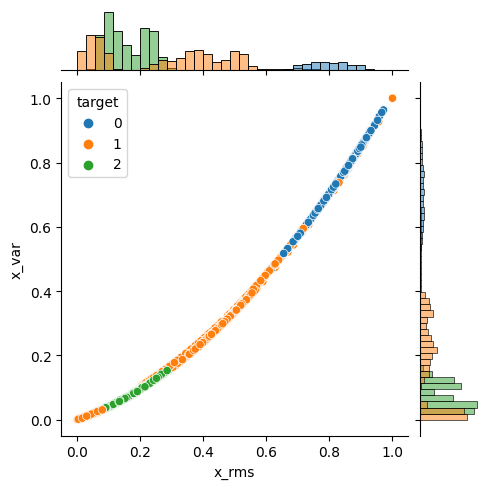

In [23]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[1], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.2 RMS vs Peak Value**

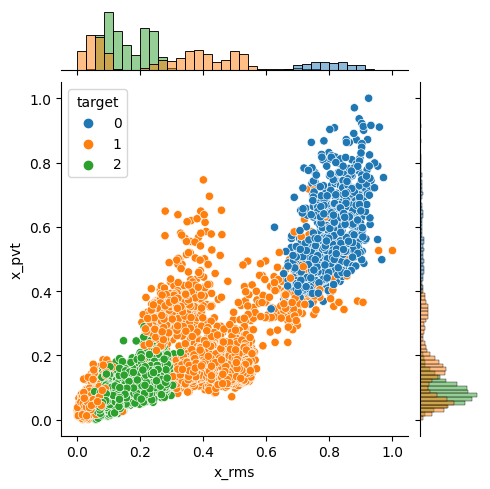

In [24]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[2], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.3 RMS vs Crest Factor**

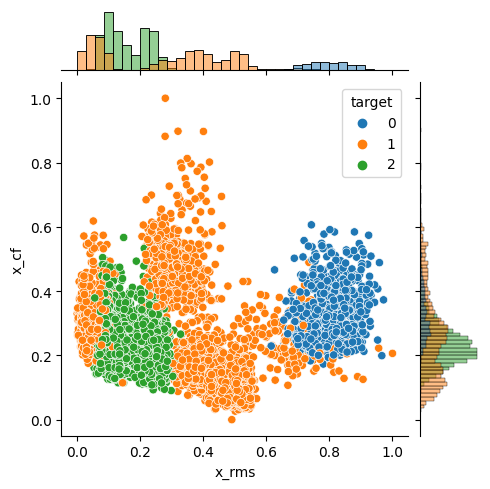

In [25]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[3], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.4 RMS vs Kurtosis**

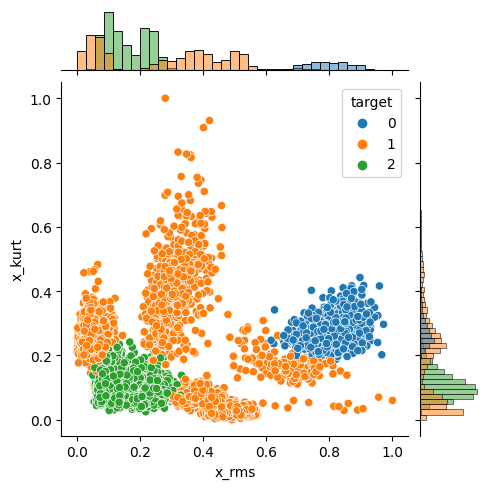

In [26]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[4], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.5 RMS vs Clearance Factor**

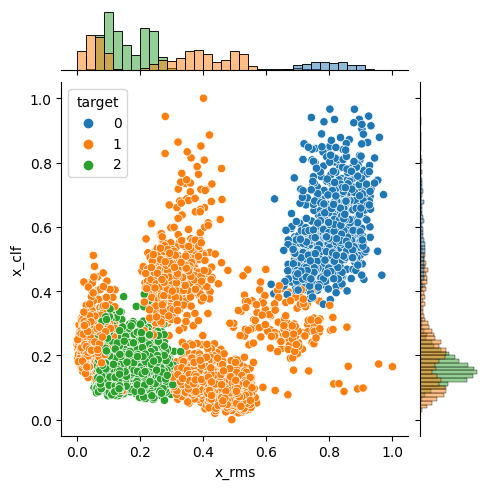

In [27]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[5], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.6 RMS vs Impulse Factor**

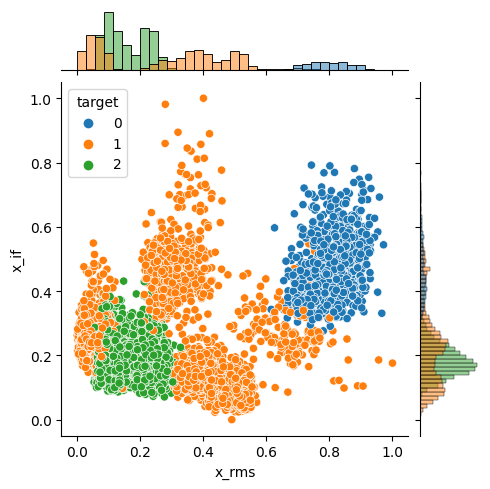

In [28]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[6], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.7 RMS vs Shape Factor**

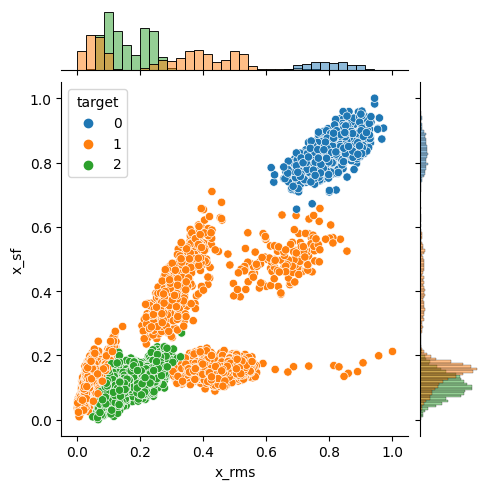

In [29]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[7], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.8 RMS vs Line Integral**

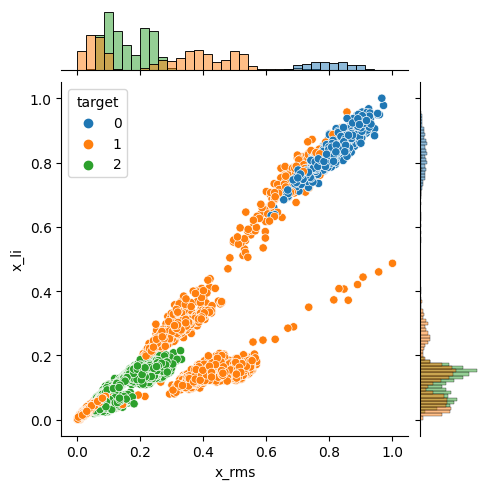

In [30]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[8], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.9 RMS vs Peak-to-Peak**

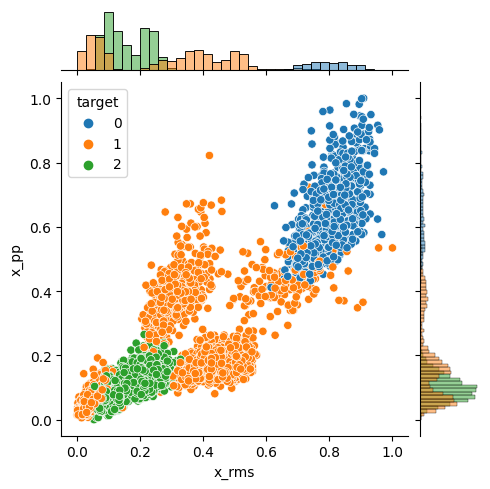

In [31]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[9], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.10 RMS vs Entropy**

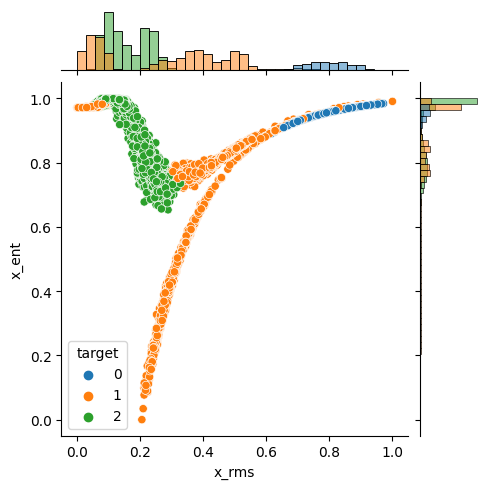

In [32]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[10], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.11 RMS vs Skewness**

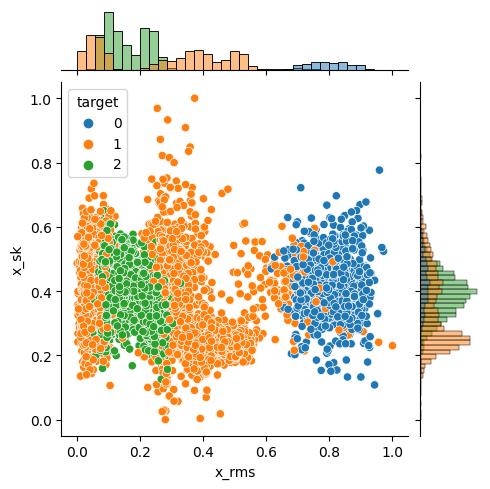

In [33]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[11], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.12 RMS vs HM5**

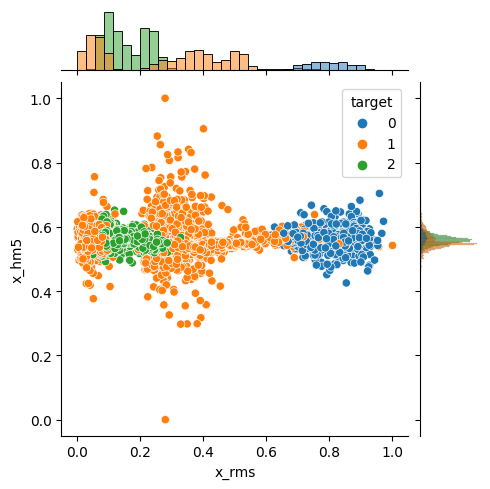

In [34]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[12], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.13 RMS vs HM6**

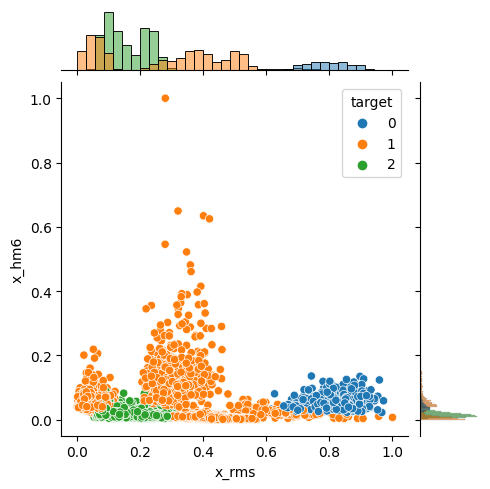

In [35]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[13], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.14 RMS vs HM7**

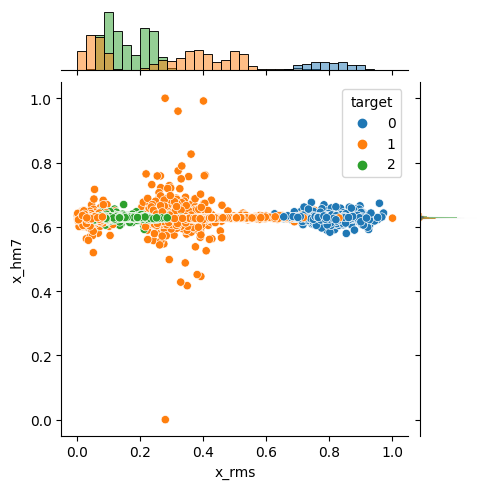

In [36]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[14], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.1.15 RMS vs HM8**

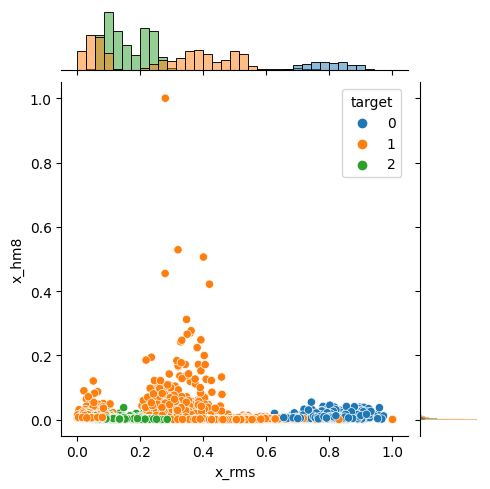

In [37]:
g = sns.JointGrid(data=train_df, x=cols[0], y=cols[15], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

### **3.2 Feature: Variance**

#### **3.2.1 Var vs Peak Value**

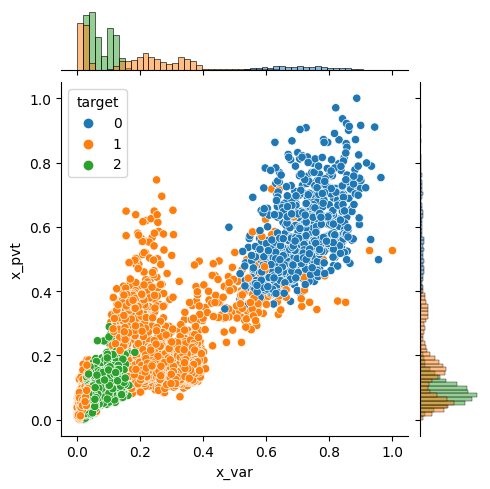

In [38]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[2], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.2 Var vs Crest Factor**

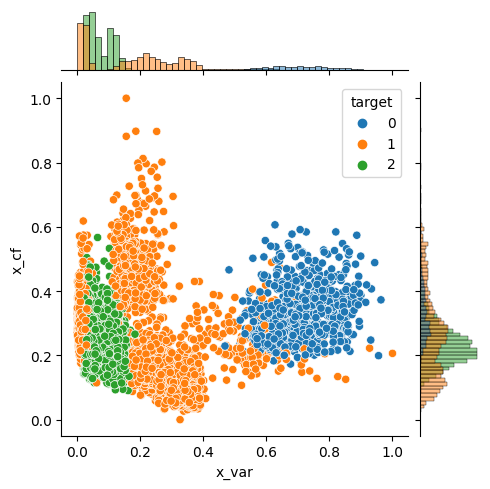

In [39]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[3], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.3 Var vs Kurtosis**

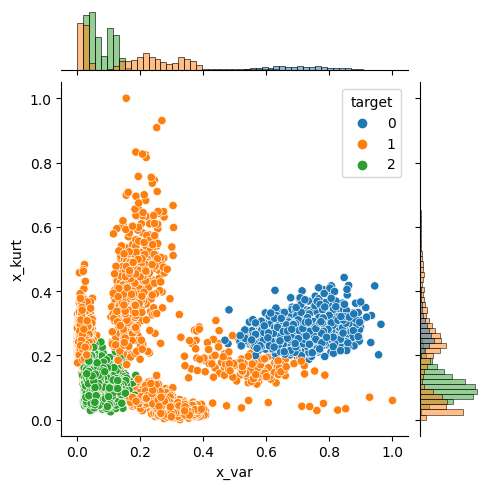

In [40]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[4], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.4 Var vs Clearance Factor**

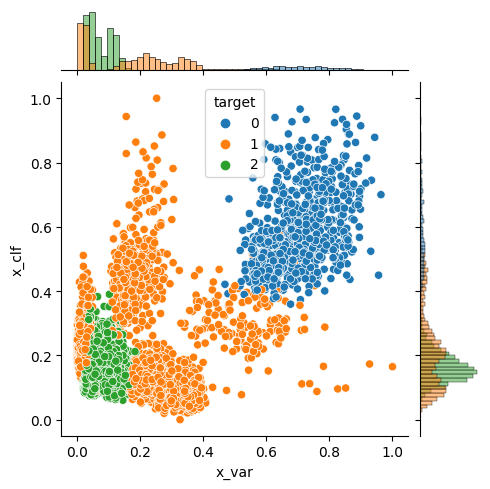

In [41]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[5], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.5 Var vs Impulse Factor**

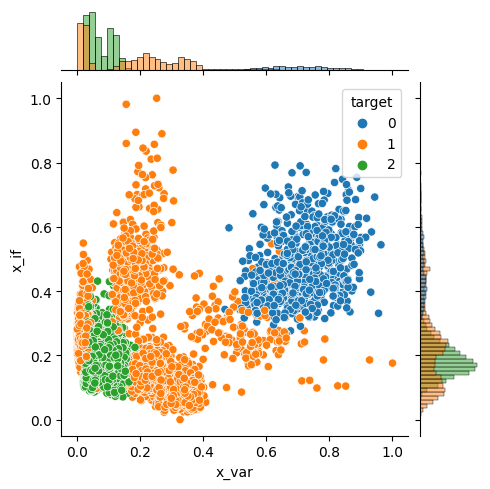

In [42]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[6], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.6 Var vs Shape Factor**

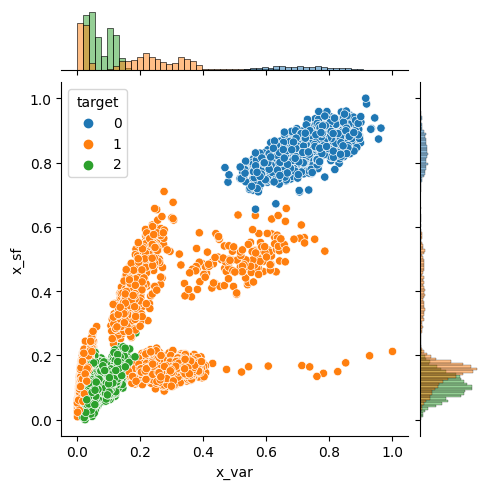

In [43]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[7], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.7 Var vs Line Integral**

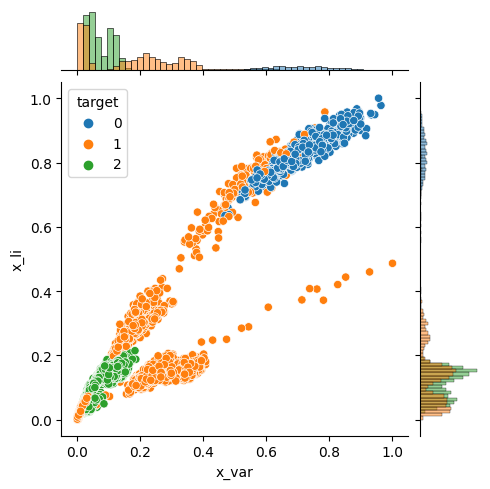

In [44]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[8], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.8 Var vs Peak-to-Peak**

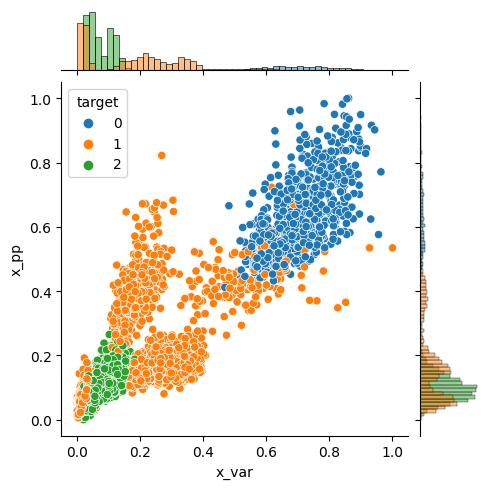

In [45]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[9], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.9 Var vs Entropy**

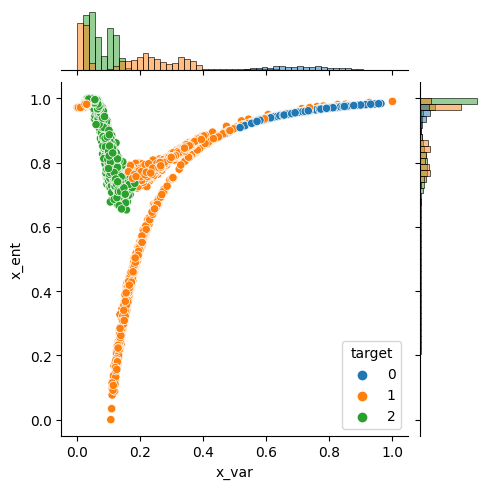

In [46]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[10], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.2.10 Var vs Skewness**

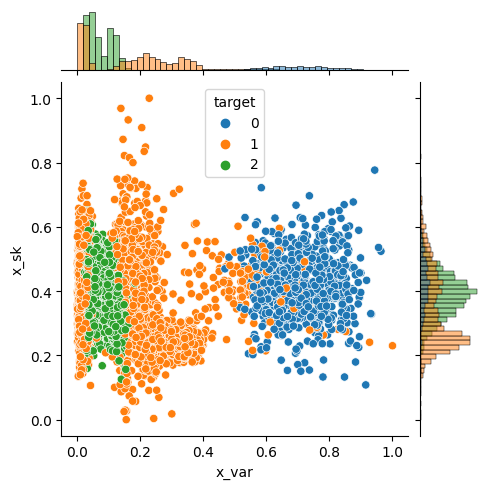

In [47]:
g = sns.JointGrid(data=train_df, x=cols[1], y=cols[11], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

### **3.3 Feature: Peak Value**

#### **3.3.1 Peak value vs Crest Factor**

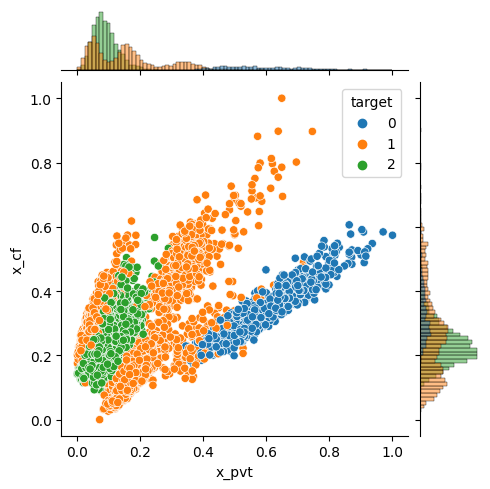

In [48]:
g = sns.JointGrid(data=train_df, x=cols[2], y=cols[3], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.3.2 Peak Value vs Kurtosis**

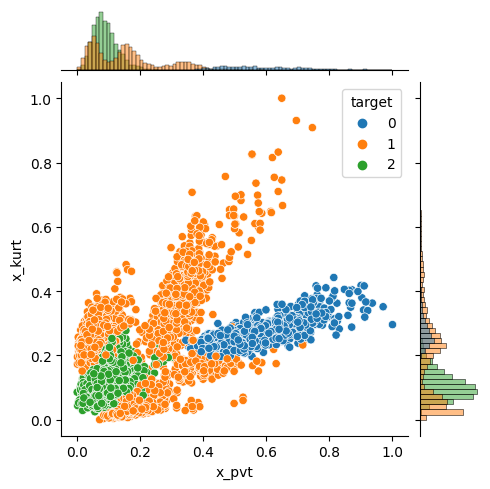

In [49]:
g = sns.JointGrid(data=train_df, x=cols[2], y=cols[4], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.3.3 Peak Value vs Clearance Factor**

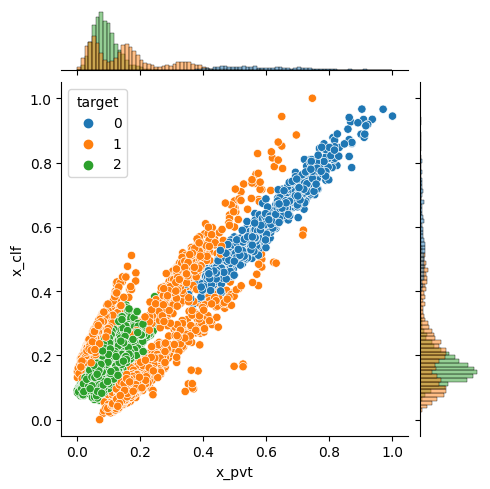

In [50]:
g = sns.JointGrid(data=train_df, x=cols[2], y=cols[5], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

#### **3.3.4 Peak Value vs Kurtosis**

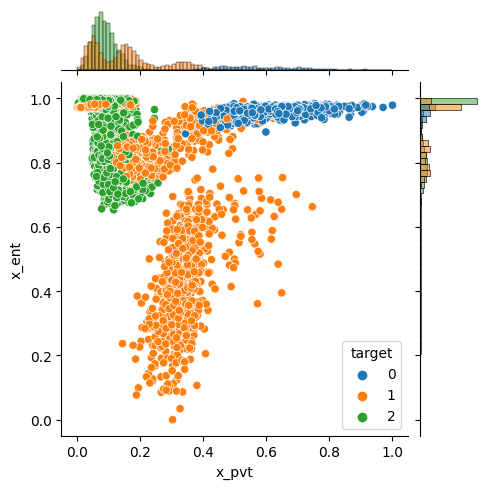

In [51]:
g = sns.JointGrid(data=train_df, x=cols[2], y=cols[10], hue="target", height=5, ratio=5)
g.plot(sns.scatterplot, sns.histplot, palette=sns.color_palette(n_colors=3));

**Based on our initial observation, are all features important?**

## **4. Feature Selection**

In the first notebook, we discussed methods to create relevant features. There are numerous ways in which these features can be created. For this study, **considering the domain**, we looked into some time-domain, frequency-domain, and time-frequency domain methods. You might want to look at all the possible features. But, this is less fruitful than one might think. Adding features leads to higher dimensionality, and this would lead to reduced generalization capability. In this section, we will focus on some popular methods of feature selection.

4.2 Model-Based

4.3 Iterative Feature Selection



### **4.1 Univariate Statistics**

In this method, we will select features based on their statistical significance. As we are working with classification, we will look into the analysis of variance (ANOVA) and techniques to filter features based on thresholding.

Note: Univariate Statistics looks into each feature separately and are independent of machine learning models.

The following cell computes the p-values using ANOVA and lists the features that are not relevant to us.

In [92]:
from sklearn.feature_selection import SelectPercentile, f_classif, SelectKBest

In [95]:
f_, p_ = f_classif(train_df[cols[:-1]], train_df[cols[-1]])
print("p-values: ", p_)
print('Features that have a p-value of more than 0.05: ', cols[:-1][p_>0.05].values)

p-values:  [0.00000000e+000 0.00000000e+000 0.00000000e+000 9.62588959e-114
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 2.37516913e-190 2.47725657e-117
 7.91506909e-013 5.06205352e-191 7.14594999e-001 4.08128744e-072
 9.13109921e-001]
Features that have a p-value of more than 0.05:  ['x_hm7' 'x_hm9']


We can see that the higher moments don't add value for this classification task, and hence should be removed.

We can proceed further with these information to ML modeling. However, in case you have a lot of features and would like to trim some off, we can employ percentile and k-best techniques.

#### **4.1.1 Percentile-based selection:**

As the name suggests, it will select the features based on the set percentile. All the features with p-values that lie within this percentile will be selected. In this example a percentile of 30% is used.

In [105]:
# the SelectPercentile method, by default, uses ANOVA
selector = SelectPercentile(percentile=60)
X_train_selected = selector.fit_transform(train_df[cols[:-1]], train_df[cols[-1]])
print("X_train.shape: {}".format(train_df[cols[:-1]].shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (8184, 17)
X_train_selected.shape: (8184, 10)


In [106]:
mask = selector.get_support()
print("Selected Columns : ", cols[:-1][mask].values)

Selected Columns :  ['x_rms' 'x_var' 'x_pvt' 'x_kurt' 'x_clf' 'x_if' 'x_sf' 'x_li' 'x_pp'
 'x_hm6']


#### **4.1.2 Select K-Best Features**

This method, similar to the previous one, will select features based on the p-values, but it is more easy to implement as it gives a control of selecting the number of features.

In [104]:
selector = SelectKBest(f_classif, k=10)
selector.fit(train_df[cols[:-1]], train_df[cols[-1]])
mask = selector.get_support()
print("Selected Columns : ", cols[:-1][mask].values)

Selected Columns :  ['x_rms' 'x_var' 'x_pvt' 'x_kurt' 'x_clf' 'x_if' 'x_sf' 'x_li' 'x_pp'
 'x_hm6']


### **4.2 Model-based Feature Selection**

In this method, features are selected with the use of supervised machine learning models. Keep in mind that the models used may not be the final selection. In this case we will use decision trees which proivdes a feature importance attribute that can be called to identify the most important features. Other supervised models can be used as well. If linear models are selected, then the features are filtered using the weights of the model.


In [98]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [99]:
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                           threshold="median")
X_train_selected = selector.fit_transform(train_df[cols[:-1]], train_df[cols[-1]])
print("X_train.shape: {}".format(train_df[cols[:-1]].shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (8184, 17)
X_train_selected.shape: (8184, 9)


In [100]:
mask = selector.get_support()
print("Selected Columns : ", cols[:-1][mask].values)

Selected Columns :  ['x_rms' 'x_var' 'x_pvt' 'x_kurt' 'x_sf' 'x_li' 'x_pp' 'x_hm6' 'x_hm8']


#### **4.3 Iterative Feature Selection**

This is a computationally intensive method as it iterates over a set of features and a list of machine learning algorithms.

#### **4.4 Correlation Matrix**

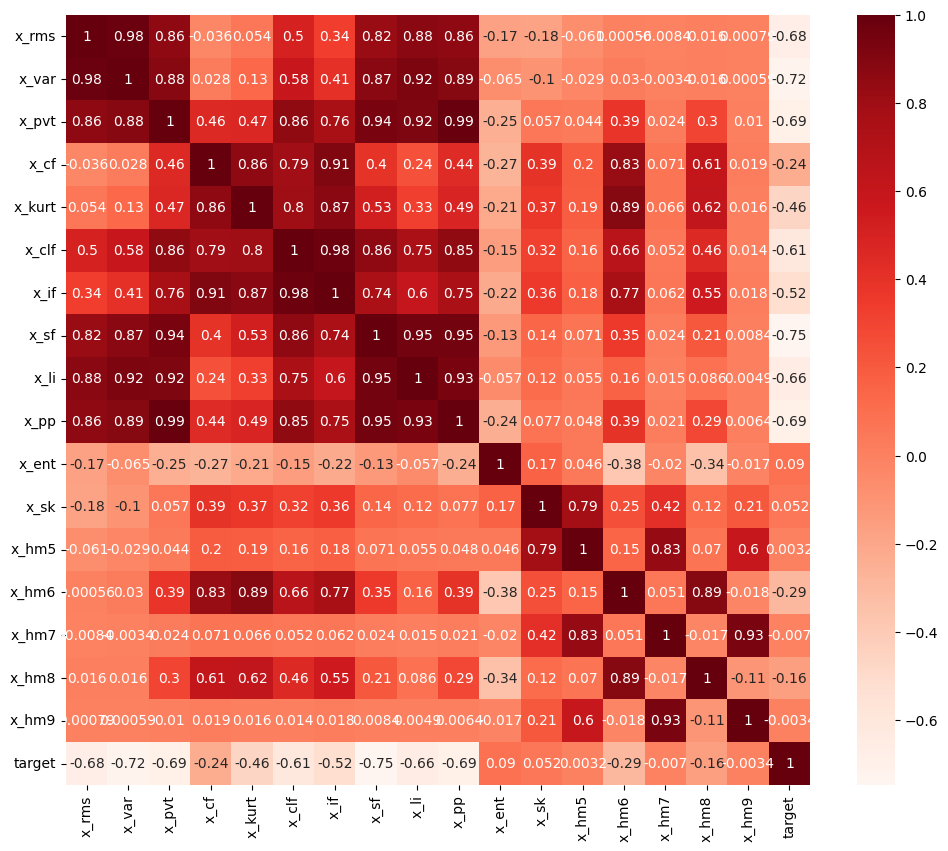

In [101]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()